#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [25]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [26]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# 1- **Basic Data Exploration**


In [27]:
##Identify the number of rows and columns in the dataset
num_of_rows, num_of_colms = df.shape
print(f'There are {num_of_rows} rows and {num_of_rows} columns in the dataset.')

There are 148654 rows and 148654 columns in the dataset.


In [28]:
##determine the data types of each column
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [29]:
##check for missing values in each column
df.isnull().sum()


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# 2- **Descriptive Statistics**

In [50]:
#Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.
print (f'The mean salary:{df["TotalPay"].mean()}')
print (f'The  median salary:{df["TotalPay"].median()}')
print (f'The  mode salary:{df["TotalPay"].mode().values}')
print (f'The minimum salary:{df["TotalPay"].min()}')
print (f'The  maximum salary:{df["TotalPay"].max()}')
range_salary = df['TotalPay'].max() - df['TotalPay'].min()
print(f'range of salaries is : {range_salary}')
print (f'the   standard deviation.:{df["TotalPay"].std()}')
      
      

The mean salary:74768.321971703
The  median salary:71426.60999999999
The  mode salary:[0.]
The minimum salary:-618.13
The  maximum salary:567595.43
range of salaries is : 568213.56
the   standard deviation.:50517.005273949944


# 3- Data Cleaning

In [51]:
##Handle missing data by suitable method with explain why you use it.
# Check for missing values in each column
print(df.isnull().sum())


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [32]:
#1. Drop 2 columns because theses cloums are null values in rows there are not any data so we choose to drop that columns:
df1 = df.drop(['Notes', 'Status'], axis=1)


#2. fill null values  in the  BasePay  column with mean value because there are no many missing values 
df1.BasePay= df1.BasePay.fillna(df1.BasePay.mean())

#3.fill null values  in the  Benefits , OvertimePay and OtherPay columns with zero because empty values in additional payments mean the value is zero 
df1.Benefits= df1.Benefits.fillna(0)
df1.OvertimePay = df1.OvertimePay.fillna(0)
df1.OtherPay= df1.OtherPay.fillna(0)

print(df1.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# 4- **Basic Data Visualization**:

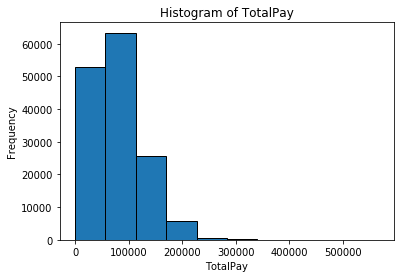

In [46]:
#Create histograms or bar charts to visualize the distribution of salaries
import matplotlib.pyplot as plt
plt.hist(df1.TotalPay, bins=10, edgecolor='black')
plt.title('Histogram of TotalPay' )
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.show()


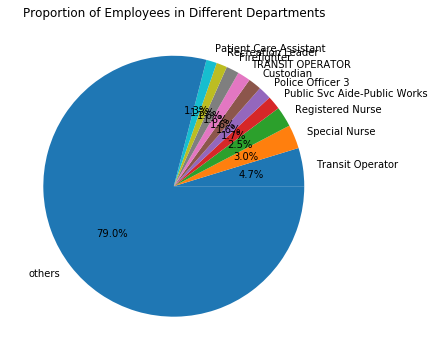

In [34]:
#and use pie charts to represent the proportion of employees in different departments.
import matplotlib.pyplot as plt

top10 = df1['JobTitle'].value_counts()[:10]
department_counts = top10
department_counts['others'] = df1['JobTitle'].value_counts()[10:].sum()

plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()

# 5- **Grouped Analysis**

In [35]:
#Group the data by one or more columns

Year_groups = df1.groupby(['Year'])

# calculate summary statistics for each group,
print(Year_groups.describe())

# compare the average salaries across different groups.
print(Year_groups.TotalPay.mean())


           Id                                                         \
        count      mean           std       min        25%       50%   
Year                                                                   
2011  36159.0   18080.0  10438.348528       1.0    9040.50   18080.0   
2012  36766.0   54542.5  10613.574335   36160.0   45351.25   54542.5   
2013  37606.0   91728.5  10856.061448   72926.0   82327.25   91728.5   
2014  38123.0  129593.0  11005.306493  110532.0  120062.50  129593.0   

                           BasePay                ...    TotalPay             \
            75%       max    count          mean  ...         75%        max   
Year                                              ...                          
2011   27119.50   36159.0  36159.0  63595.956517  ...  102512.680  567595.43   
2012   63733.75   72925.0  36766.0  65436.406857  ...  104099.170  362844.66   
2013  101129.75  110531.0  37606.0  69576.866579  ...  109637.670  347102.32   
2014  139123.50

# 6- **Simple Correlation Analysis**: 

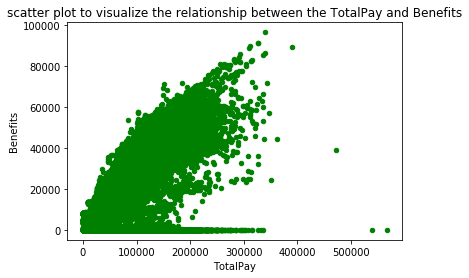

In [48]:
#Identify any correlation between salary and another numerical column, 

df1.TotalPay.corr(df1.Benefits)

# plot a scatter plot to visualize the relationship.
df1.plot.scatter(x='TotalPay', y='Benefits',c='green')
plt.title('scatter plot to visualize the relationship between the TotalPay and Benefits')
plt.show()


# 7- **Summary of Insights**

 #Write a brief report summarizing the findings and insights from the analyses.
 
 
This data set can be used to perform various analysis,
such as understanding the distribution of salaries within the jobtitle,
as well as knowing the differences in the job title of each employee.
We found in this  data set various types of data, where 3 columns are Objectives "string data", 
2 columns are Integer and 8 columns are float. 
Also we found missing values in some columns like in Notes and Status columns are null there are no data 
so we drop these columns,
BasePay  column we filled the null values with mean value because there are no many missing values and 
in the  Benefits , OvertimePay and OtherPay columns we filled the null values with zero because empty values in additional payments means the value is zero.

It is important to handle this data responsibly due to the sensitive nature of the information.